In [1]:
# import dependencies
# import sys
# !{sys.executable} -m pip install cartopy
import glacierml as gl
import pandas as pd
import numpy as np
import imageio
pd.set_option('display.max_columns', None)

In [2]:
parameterization = '4'
method = '1'
loss = 'first'

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
def plot_vol_data(
    size_thresh_1 = 1e-5, size_thresh_2 = 1e4,
    log = True, ticks = True
):
    (
        x,y,z,
        x_new,y_new,z_new,
        df,index
    ) = gl.assign_arrays(
        parameterization = parameterization,method = method,
        size_thresh_1 = size_thresh_1, size_thresh_2 = size_thresh_2
    )

    fig, ax = plt.subplots(figsize = (10,8))
    plt.scatter(x_new, y_new, c = z_new, cmap = 'viridis', marker = '.')
    plt.plot(
        (size_thresh_1,size_thresh_2),(size_thresh_1,size_thresh_2), 'orange', linewidth = 3
    )
    
    if log == True:
        plt.xscale('log')
        plt.yscale('log')

    plt.axis('square')
    if ticks == True:
        import numpy as np
        major_ticks = np.logspace(-5,4,10)

        plt.xticks(major_ticks)
        plt.yticks(major_ticks)
    plt.xlim(size_thresh_1,size_thresh_2)
    plt.ylim(size_thresh_1,size_thresh_2)
    plt.title('Selected Volume Subset')
    plt.xlabel('Farinotti Volume (km$^3$)')
    plt.ylabel('This Study Volume (km$^3$)')
    plt.colorbar(label = 'Log Density')
    plt.clim()
    plt.show()

In [4]:
# plot_vol_data(
#     size_thresh_1 = 1e-5, size_thresh_2 = 1e-3,
#     log = True, ticks = True
# )

In [5]:
# st1 = 1e-5
# st2 = 1e-3
# # plot_vol_data(
# #     size_thresh_1 = st1, size_thresh_2 = st2,
# #     log = True, ticks = True
# # )

# (
#     x,y,z,unc,
#     x_new,y_new,z_new,unc_new ,
#     df,index
# ) = gl.assign_arrays(
#     parameterization = parameterization,method = method,
#     size_thresh_1 = st1, size_thresh_2 = st2
# )    

# df

In [6]:
def plot_thick_data(
        size_thresh_1 = 1e-5, size_thresh_2 = 1e4,
    ):
    
    

    (
        x,y,z,
        x_new,y_new,z_new,
        df,index
    ) = gl.assign_arrays(
        parameterization = parameterization,method = method,
        size_thresh_1 = st1, size_thresh_2 = st2
    )    
    x,y,z,zf,ze,unc,df,feat = gl.assign_sub_arrays(
        index,st1, st2,
        parameterization = parameterization,method = method,
        feature = 'Slope'
    )
    
    
    
    
    
    fig, ax = plt.subplots(figsize = (10,8))
    plt.scatter(x, y, c = z, cmap = 'viridis', marker = '.')
    
    plt.plot(
        (0  ,   max(np.ceil(np.max(x)),np.ceil(np.max(y)))),
         (0  ,   max(np.ceil(np.max(x)),np.ceil(np.max(y)))),
        'orange', linewidth = 3
    )
    plt.title('Selected Subset Thickness')
    plt.xlabel('Farinotti Mean Thickness (m)')
    plt.ylabel('This Study Mean Thickness (m)')
    plt.colorbar(label = 'Glacier Log Density')
    plt.show()
#     plt.savefig(f'img/img_{size_thresh_2}.png', 
#         transparent = False,  
#         facecolor = 'white'
#        )
#     plt.close()

#     if log == True:
#         plt.xscale('log')
#         plt.yscale('log')

#     plt.axis('square')
#     if ticks == True:
#         import numpy as np
#         major_ticks = np.logspace(-5,4,10)

#         plt.xticks(major_ticks)
#         plt.yticks(major_ticks)
#     plt.show()

2.0.0


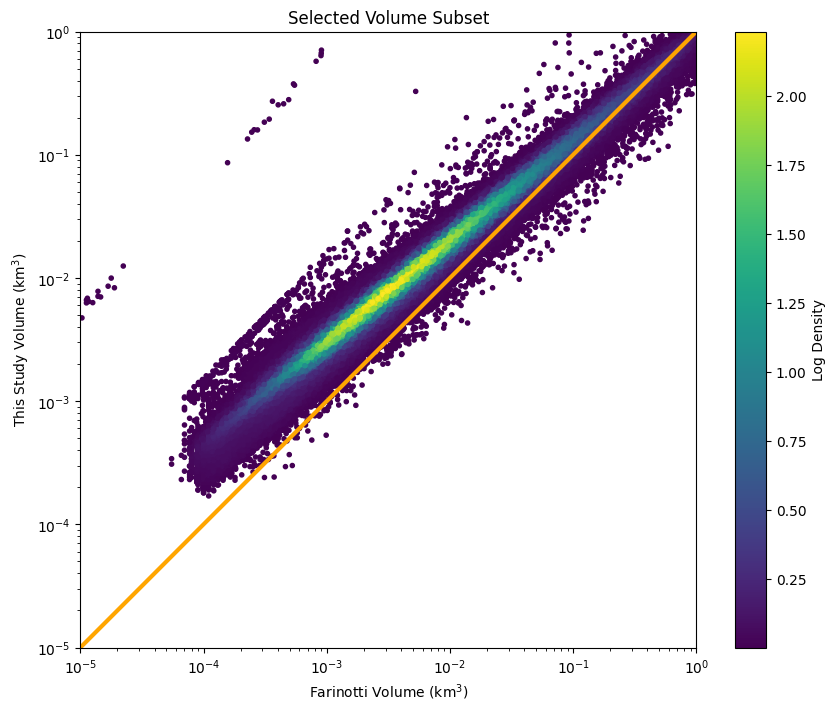

2.0.0


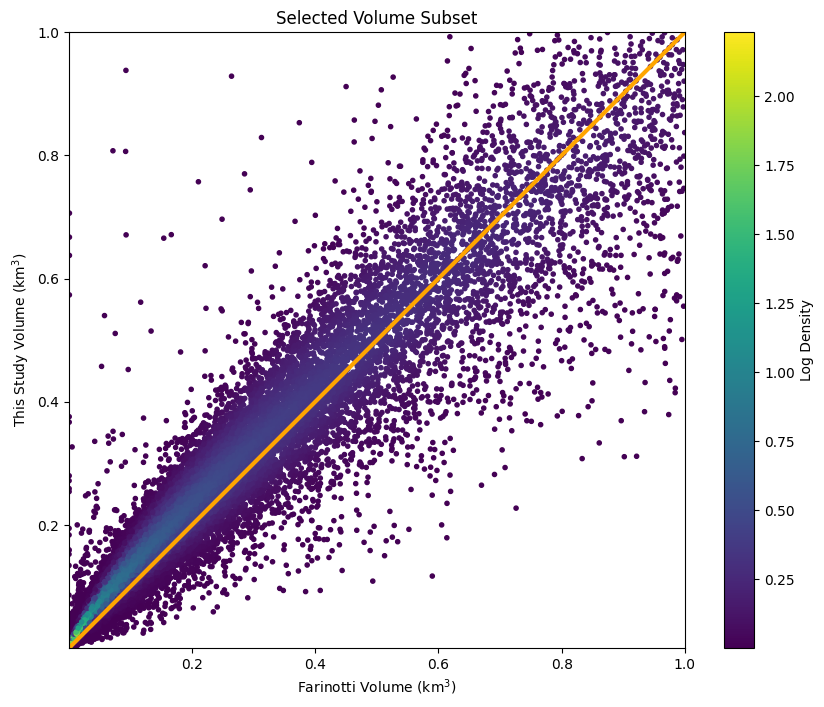

2.0.0
2.0.0


/home/sa42/notebooks/glacier_prethicktor/glacierml.py:1979: RuntimeWarning: divide by zero encountered in log10
  xy = np.vstack([np.log10(x),np.log10(feat)])
/home/sa42/miniconda3/envs/new_kernel/lib/python3.8/site-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

In [7]:
st1 = 1e-5
st2 = 1e0

plot_vol_data(
    size_thresh_1 = st1, size_thresh_2 = st2,
    log = True, ticks = True
)

plot_vol_data(
    size_thresh_1 = st1, size_thresh_2 = st2,
    log = False, ticks = False
)

plot_thick_data(
        size_thresh_1 = st1, size_thresh_2 = st2,
    )



# Make GIFs

In [ ]:
# def feature_thickness_plot(x,y,zf,ze,feat,unit):
#     fig, ax = plt.subplots(2,1,figsize = (8,15))
#     for i in range(2):
#         if i == 0:
#             z = zf
#             thick = x
#             title = 'Farinotti'
#         if i == 1:
#             z = ze
#             thick = y
#             title = 'This Study'
#         scatter = ax[i].scatter(
#             feat,thick, c = z,cmap = 'viridis',
#             marker = '.'
#         )
#         ax[i].set_title(title)
#     #                 ax[i].set_ylim(0,250)
#     #                 ax[i].set_xlim(10,1e5)
#     #                 ax[i].set_xscale('log')
#     #             ax[i].set_yscale('log')
#         plt.colorbar(scatter, label = 'Log Density')
#     #             plt.xscale('log')

#     fig.supxlabel(feat + unit, y = 0.07)
#     fig.supylabel('Thickness (m)', x = 0.035)
#     fig.suptitle(feat + '-Thickness Data from Volume Subset '+ 
#                  str(st1) + ' - ' + str(j) + ' (km$^3$)', y = 0.92)
#     plt.show()





#     save_title = feature + '_' + str(j)
#     plt.savefig(f'img/img_{save_title}.png', 
#         transparent = False,  
#         facecolor = 'white'
#        )
#     plt.close()

In [ ]:
# import matplotlib.pyplot as plt
# # floor = np.logspace(-4,3,8)
# ceil = np.logspace(-3,4,8)
# floor = 1e-4
# def make_frame(floor,ceil):
#     feature_list = [
        
#         'Area', 
#         'Slope', 
#         'Lmax', 
#         'Zmin',
# #         'Zmax'
#     ]
    

#     for j in (ceil):
# #         print(n)
# #         print(i)
#         print(j)
#         (
#             x,y,z,
#             x_new,y_new,z_new,
#             df,index
#         ) = gl.assign_arrays(
#             parameterization = parameterization,method = method,
#             size_thresh_1 = floor, size_thresh_2 = j
#         )  
#         for feature in feature_list:

#             if feature == 'Area':
#                 unit = ' (km$^2$)'
#             if ('Z' in feature) or ('L' in feature):
#                 unit = ' (m)'
#             if feature == 'Slope':
#                 unit = ' (Degrees)'


#             x,y,z,zf,ze,unc,df,feat = gl.assign_sub_arrays(
#                 index,floor,j,
#                 parameterization,method,
#                 feature
#             )
# #             print(feat.min())
#             fig, ax = plt.subplots(2,1,figsize = (8,15))
#             for k in range(2):
#                 if k == 0:
#                     z = zf
#                     thick = x
#                     title = 'Farinotti'
#                 if k == 1:
#                     z = ze
#                     thick = y
#                     title = 'This Study'
#                 scatter = ax[k].scatter(
#                     feat,thick, c = z,cmap = 'viridis',
#                     marker = '.'
#                 )
#                 ax[k].set_title(title)

#                 plt.colorbar(scatter, label = 'Log Density')

#             fig.supxlabel(feature + unit, y = 0.07)
#             fig.supylabel('Thickness (m)', x = 0.035)
#             fig.suptitle(feature + '-Thickness Data from Volume Subset '+ 
#                          str(floor) + ' - ' + str(j) + ' (km$^3$)', y = 0.92)
#             save_title = feature + '-' + str(j)
# #             plt.savefig(f'img/img_{save_title}.png', 
# #                 transparent = False,  
# #                 facecolor = 'white'
# #                )
#             plt.show()
# #             break

    
# make_frame(floor,ceil)

In [ ]:
# feature_list = [

#     'Area', 
#     'Slope', 
#     'Lmax', 
#     'Zmin',
# #         'Zmax'
# ]
# for feat in feature_list:
#     frames = []
#     for j in ((ceil)):
#         save_path = feat + '_' + str(i) + '-' + str(j)
#         image = imageio.v2.imread(f'img/img_{save_path}.png')
#         frames.append(image)
#     imageio.mimsave(feat + '_example.gif', # output gif
#                 frames,          # array of input frames
#                 duration = 3000,
#                 loop = 10
#                )   